In [74]:
import pandas as pd
import openpyxl
from openpyxl import Workbook
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우에서 사용 (리눅스에서는 'NanumGothic')
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 제대로 표시되게 설정


In [75]:
# pandas가 알아서 엑셀 읽어서 데이터 만들고 딴다라 다 함
export = pd.read_excel('./data/수산물_수출입_품종별.xlsx', index_col=0)  # 첫번째 열을 인덱스로 데이터 읽기


In [72]:
export.index

Index(['김', '참치', '명태', '대구', '기타어류', '어류가공품', '기타게', '이빨고기', '연어', '굴', '고등어',
       '전복', '삼치', '오징어', '넙치', '기타수산물분', '기타갑각류', '게살', '기타연체동물', '붕장어', '미역',
       '해삼', '어란', '전갱이', '청어', '해파리', '새우', '기타해조류', '왕게', '톳', '기타',
       '합   계'],
      dtype='object', name='어종')

      어종    년도        어획량
13   오징어  2017  22637.601
45   오징어  2018   7493.775
77   오징어  2019   8168.163
109  오징어  2020   7172.321
141  오징어  2021  21726.761
173  오징어  2022  15797.648


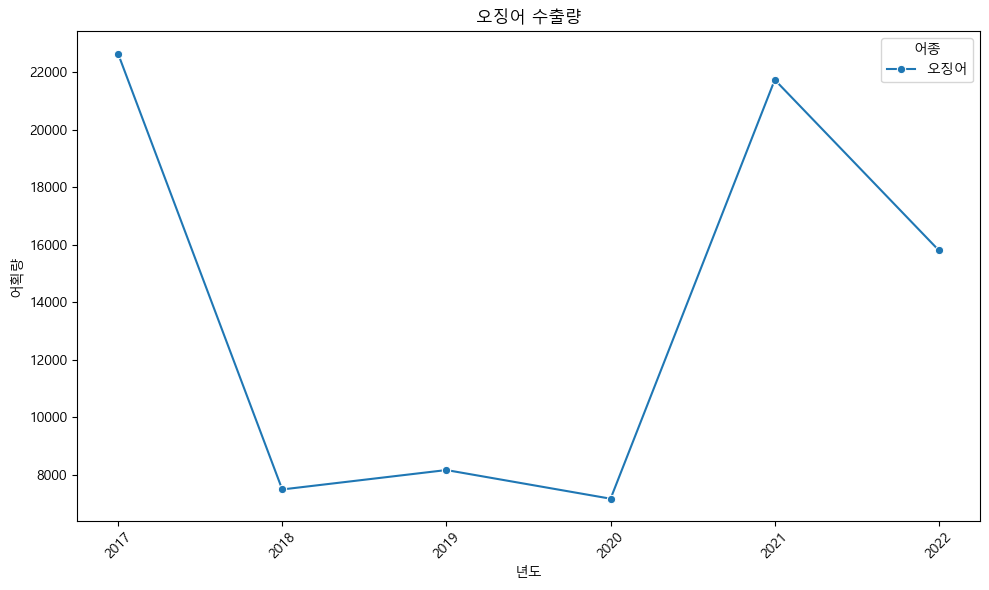

In [67]:
# 오징어 라인 그래프
export_reverse = export.reset_index().melt(id_vars=['어종'], var_name='년도', value_name='어획량') # 데이터를 long format으로 변환
#어종을 y축, 년도를 x축으로 세우기 위함
squid_data = export_reverse[export_reverse['어종'] == '오징어'] # 오징어에 대한 데이터만
print(squid_data)
# 선 그래프 그리기
plt.figure(figsize=(10, 6))
sns.lineplot(data=squid_data, x='년도', y='어획량', hue='어종', marker='o')

# 그래프 꾸미기
plt.title('오징어 수출량')
plt.xlabel('년도')
plt.ylabel('수출량(톤)')
plt.xticks(rotation=45)  # x축 년도 레이블 회전
#plt.legend(title='어종')

# 그래프 표시
plt.tight_layout()
plt.show()

      어종    년도        어획량
25   해파리  2017    279.346
57   해파리  2018   1470.535
89   해파리  2019   2065.449
121  해파리  2020   1492.270
153  해파리  2021   8353.228
185  해파리  2022  14049.191


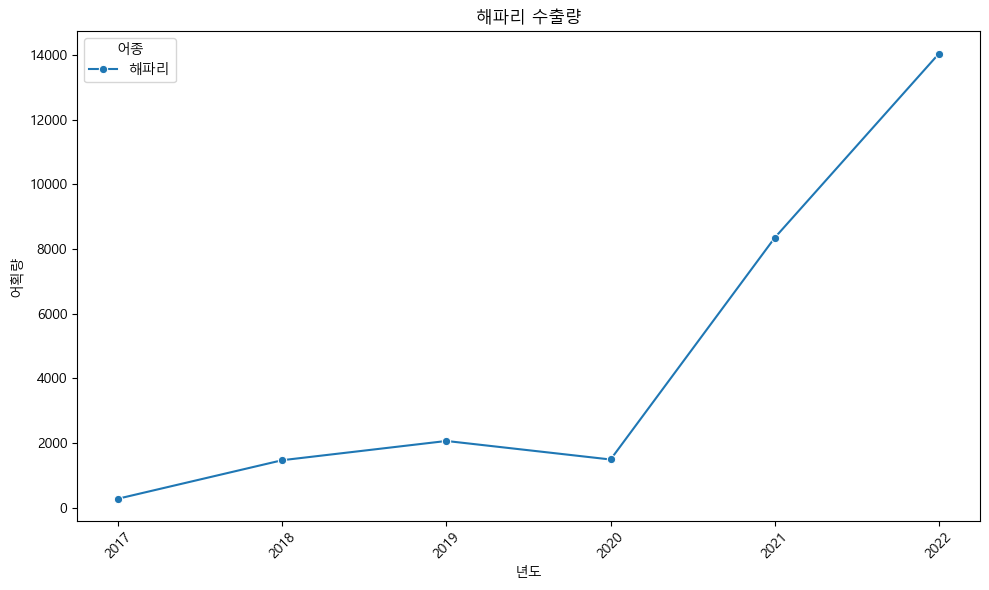

In [ ]:
# 해파리 라인인 그래프
export_reverse = export.reset_index().melt(id_vars=['어종'], var_name='년도', value_name='어획량') # 데이터를 long format으로 변환
#어종을 y축, 년도를 x축으로 세우기 위함
jellyfish_data = export_reverse[export_reverse['어종'] == '해파리'] # 해파리에 대한 데이터만
print(jellyfish_data)

# 선 그래프 그리기
plt.figure(figsize=(10, 6))
sns.lineplot(data=jellyfish_data, x='년도', y='어획량', hue='어종', marker='o')

# 그래프 꾸미기
plt.title('해파리 수출량')
plt.xlabel('년도')
plt.ylabel('수출량(톤)')
plt.xticks(rotation=45)  # x축 년도 레이블 회전
#plt.legend(title='어종')

# 그래프 표시
plt.tight_layout()
plt.show()

     어종    년도         어획량
31   합계  2017  539512.003
63   합계  2018  632133.689
95   합계  2019  687534.040
127  합계  2020  614643.620
159  합계  2021  813169.431
191  합계  2022  926296.054


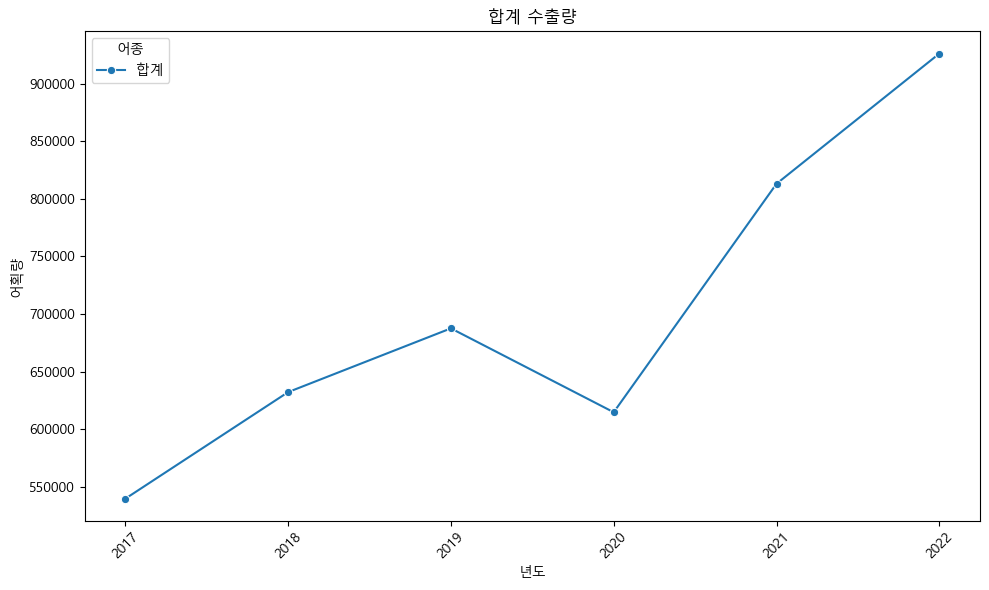

In [ ]:
# 합계 라인 그래프
export_reverse = export.reset_index().melt(id_vars=['어종'], var_name='년도', value_name='어획량') # 데이터를 long format으로 변환
#어종을 y축, 년도를 x축으로 세우기 위함
jellyfish_data = export_reverse[export_reverse['어종'] == '합계'] # 해파리에 대한 데이터만
print(jellyfish_data)

# 선 그래프 그리기
plt.figure(figsize=(10, 6))
sns.lineplot(data=jellyfish_data, x='년도', y='어획량', hue='어종', marker='o')

# 그래프 꾸미기
plt.title('합계 수출량')
plt.xlabel('년도')
plt.ylabel('수출량(톤)')
plt.xticks(rotation=45)  # x축 년도 레이블 회전
#plt.legend(title='어종')

# 그래프 표시
plt.tight_layout()
plt.show()

In [47]:
# 첫 행을 column 기준으로 잡고 df 만들기
wb = openpyxl.load_workbook('./data/수산물_수출입_품종별.xlsx') # 어종, 년도 - 중량(MT - Metric Ton)
ws = wb['어종별수출'] # 수출 데이터

data = [] # 데이터

first_row = [cell.value for cell in ws[1]] # 첫번째 열

for row in ws.iter_rows(min_row=2, values_only=True):  # 데이터 행마다 읽기
    data.append(row) # 데이터 추가


df = pd.DataFrame(data, columns=first_row) # 첫번째 열을 기준으로 한 데이터프레임
df.set_index(df.columns[0], inplace = True)

# 엑셀 파일 닫기
wb.close()